# Tema 1

Import libraries

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as scs

Download daily data for Apple and Tesla

In [72]:
df1 = yf.download('AAPL', 
                       start='2011-01-01', 
                       end='2022-01-01',
                       progress=False)

In [73]:
df2 = yf.download('TSLA', 
                       start='2011-01-01', 
                       end='2022-01-01',
                       progress=False)

Preview data

In [74]:
df1.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03 00:00:00-05:00,11.630000,11.795000,11.601429,11.770357,10.049906,445138400
2011-01-04 00:00:00-05:00,11.872857,11.875000,11.719643,11.831786,10.102359,309080800
2011-01-05 00:00:00-05:00,11.769643,11.940714,11.767857,11.928571,10.184994,255519600
2011-01-06 00:00:00-05:00,11.954286,11.973214,11.889286,11.918929,10.176761,300428800
2011-01-07 00:00:00-05:00,11.928214,12.012500,11.853571,12.004286,10.249642,311931200


In [75]:
df2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03 00:00:00-05:00,1.789333,1.800000,1.726667,1.774667,1.774667,19245000
2011-01-04 00:00:00-05:00,1.777333,1.796667,1.734667,1.778000,1.778000,17811000
2011-01-05 00:00:00-05:00,1.765333,1.793333,1.746000,1.788667,1.788667,21700500
2011-01-06 00:00:00-05:00,1.788667,1.866667,1.787333,1.858667,1.858667,30918000
2011-01-07 00:00:00-05:00,1.866667,1.905333,1.860000,1.882667,1.882667,33718500


Keep the adjusted close prices only

In [76]:
df1 = df1.loc[:, ['Adj Close']]
df1.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [77]:
df2 = df2.loc[:, ['Adj Close']]
df2.rename(columns={'Adj Close':'adj_close'}, inplace=True)

Convert adjusted close prices to simple and log returns

In [78]:
df1['simple_rtn'] = df1.adj_close.pct_change()
df1['log_rtn'] = np.log(df1.adj_close/df1.adj_close.shift(1))

df1.dropna(how = 'any', inplace = True)

In [79]:
df2['simple_rtn'] = df2.adj_close.pct_change()
df2['log_rtn'] = np.log(df2.adj_close/df2.adj_close.shift(1))

df2.dropna(how = 'any', inplace = True)

Plot Apple and Tesla time series

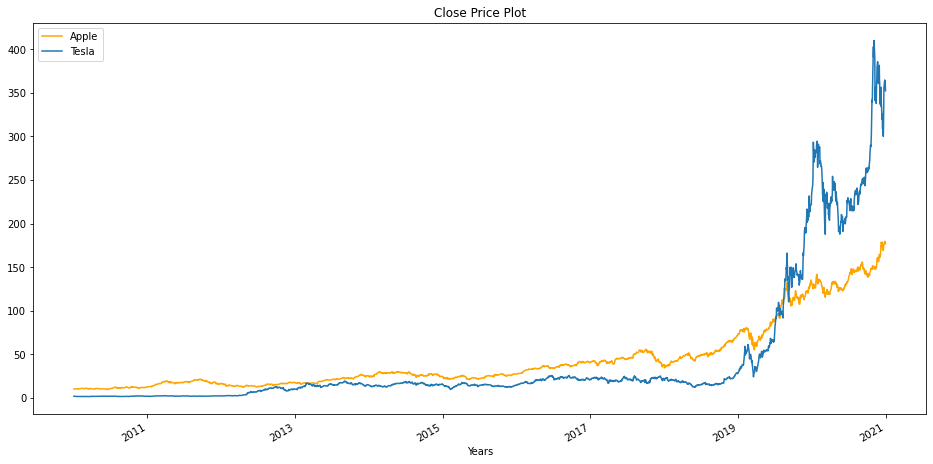

In [80]:
# set the plot size
plt.figure(figsize=(16, 8))
  
df1['adj_close'].plot(label='Apple', color='orange')
df2['adj_close'].plot(label='Tesla')
  
# adding title to the plot
plt.title('Close Price Plot')
  
# adding Label to the x-axis
plt.xlabel('Years')
  
# adding legend to the curve
plt.legend()

Apple - distribution of returns and statistics

Text(0.5, 1.0, 'Distribution of Apple returns')

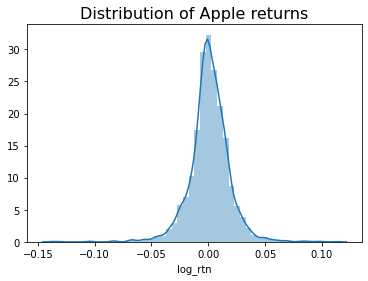

In [81]:
# histogram
fig = sns.distplot(df1.log_rtn, kde=True, norm_hist=True)                                    
fig.set_title('Distribution of Apple returns', fontsize=16)                                                    

In [82]:
jb_test = scs.jarque_bera(df1.log_rtn.values)

print('---------- Descriptive Statistics Apple ----------')
print('Range of dates:', min(df1.index.date), '-', max(df1.index.date))
print('Number of observations:', df1.shape[0])
print(f'Mean: {df1.log_rtn.mean():.4f}')
print(f'Median: {df1.log_rtn.median():.4f}')
print(f'Min: {df1.log_rtn.min():.4f}')
print(f'Max: {df1.log_rtn.max():.4f}')
print(f'Standard Deviation: {df1.log_rtn.std():.4f}')
print(f'Skewness: {df1.log_rtn.skew():.4f}')
print(f'Kurtosis: {df1.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics Apple ----------
Range of dates: 2011-01-04 - 2021-12-31
Number of observations: 2768
Mean: 0.0010
Median: 0.0009
Min: -0.1377
Max: 0.1132
Standard Deviation: 0.0178
Skewness: -0.3403
Kurtosis: 6.4375
Jarque-Bera statistic: 4812.51 with p-value: 0.00


Tesla - distribution of returns and statistics

Text(0.5, 1.0, 'Distribution of Tesla returns')

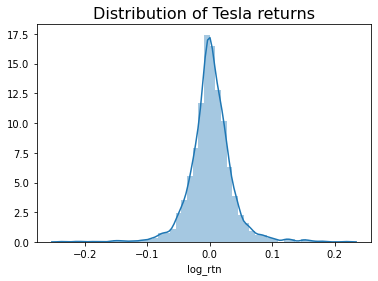

In [83]:
fig = sns.distplot(df2.log_rtn, kde=True, norm_hist=True)                                    
fig.set_title('Distribution of Tesla returns', fontsize=16)                                                    

In [84]:
jb_test = scs.jarque_bera(df2.log_rtn.values)

print('---------- Descriptive Statistics Tesla ----------')
print('Range of dates:', min(df2.index.date), '-', max(df2.index.date))
print('Number of observations:', df2.shape[0])
print(f'Mean: {df2.log_rtn.mean():.4f}')
print(f'Median: {df2.log_rtn.median():.4f}')
print(f'Min: {df2.log_rtn.min():.4f}')
print(f'Max: {df2.log_rtn.max():.4f}')
print(f'Standard Deviation: {df2.log_rtn.std():.4f}')
print(f'Skewness: {df2.log_rtn.skew():.4f}')
print(f'Kurtosis: {df2.log_rtn.kurtosis():.4f}') 
print(f'Jarque-Bera statistic: {jb_test[0]:.2f} with p-value: {jb_test[1]:.2f}')

---------- Descriptive Statistics Tesla ----------
Range of dates: 2011-01-04 - 2021-12-31
Number of observations: 2768
Mean: 0.0019
Median: 0.0013
Min: -0.2365
Max: 0.2183
Standard Deviation: 0.0346
Skewness: 0.0382
Kurtosis: 5.9326
Jarque-Bera statistic: 4042.34 with p-value: 0.00
